In [1]:
!pip install pandas-profiling

In [2]:
pip install pyqt5 matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
from PIL import Image
import cv2
import joblib
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
from collections import Counter

In [4]:
FishCategories = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel", "Red Mullet", 
                  "Red Sea Bream", "Sea Bass", "Shrimp","Striped Red Mullet", "Trout"]
ColorLabels = ['Red','Orange','Brown','Tan','Blue', 'LightBlue','Gray', 'White','Black']
np.array(ColorLabels)
ColorValues = [[200,75,75], [200,125,75], [151,122,83], [217,171,118],[75,75,200],[165,165,165],[125,125,125],[235,235,235],[20,20,20]]
ColorValuesMap = [[200,75,75], [200,125,75], [151,122,83], [217,171,118],[20,20,20],[20,20,20],[20,20,20],[235,235,235],[20,20,20]]


######################## GET IMAGES FROM KAGGLE AND INTO PYTHON ########################
#This function downloads the dataset from Kaggle.com and stores it in the working directory
def DownloadDataset():
    os.environ['KAGGLE_USERNAME'] = 'capstoneddg'
    os.environ['KAGGLE_KEY'] = '43717164337825aa55a1ba0dc8c4b0f2'
    from kaggle.api.kaggle_api_extended import KaggleApi
    api = KaggleApi()
    print("Authenticating API")
    api.authenticate()
    print("Downloading Dataset to Working Directory")
    print("This could take a few minutes.")
    api.dataset_download_file("crowww/a-large-scale-fish-dataset", file_name = '')
    print("Download Complete")

#This function runs through the zip folder and extracts out the images   
def GetData ():
    RawColor = []
    RawBW = []
    ImageLabel = []
    FishPosition = []
    counter = 0
    print("Getting Images")
    with zipfile.ZipFile(os.path.join(os.getcwd(),'archive.zip'), 'r') as zipref:
        for imagepath in zipref.namelist():
            if (imagepath.__contains__('GT')):
                pass
            elif (imagepath.__contains__('NA_Fish_Dataset')):
                pass
            elif (imagepath.__contains__('png')): #Text was img
                for FishType in FishCategories:
                    if imagepath.__contains__(FishType):
                        fishcategory = FishType
                        FishNumber = FishCategories.index(FishType)
                OriginalImage = Image.open(zipref.open(imagepath))
                OriginalImagePixelBGR = np.array(OriginalImage)
                ImageLabel.append(fishcategory)
                FishPosition.append(FishNumber)
                RawBW.append(cv2.cvtColor(OriginalImagePixelBGR, cv2.COLOR_BGR2GRAY))
               # ResizedImage = Resize(OriginalImagePixelBGR,75,75)
               # ResizedImagePixelBGR = np.array(ResizedImage)
                RawColor.append(OriginalImagePixelBGR)    
                if (counter + 1) % 500==0:
                    print("Retrieved",counter + 1,"Images of 9000")
                elif counter == 0:
                    print("Retrieved",counter,"Images of 9000")
                counter = counter + 1
    return np.array(RawColor), np.array(ImageLabel),np.array(RawBW), np.array(FishPosition)

# Gets the average color value of an image of a given color
def GetColorAverage(ColorNumber):
    col = []
    for c in range(len(ColorImages)):
        ca = np.mean(ColorImages[c][:,:,ColorNumber])
        col.append(ca)
    return np.array(col)

# Gets the average color value of an image at a given percentile for a given color
def GetColorQ(ColorNumber,pct):
    col = []
    for c in range(len(ColorImages)):
        ca = np.array(ColorImages[c][:,:,ColorNumber])
        q = np.percentile(ca, pct)
        col.append(q)
    return np.array(col)

#Applies a filtering across the image to remove black and blue color pixels
def ColorFilters(fishImage):
    RedF = (fishImage[:,:,0] > 100)
    InvBlueF = (fishImage[:,:,2] < 115)
    WhiteF = ((fishImage[:,:,0] > 180) & (fishImage[:,:,1] > 180) & (fishImage[:,:,2] > 130))
    BlackF = ((fishImage[:,:,0] < 25) & (fishImage[:,:,1] < 25) & (fishImage[:,:,2] < 25))
    GrayF = (fishImage[:,:,0] < 140) & (fishImage[:,:,1] < 140) & (fishImage[:,:,2] < 140) & (fishImage[:,:,0] > 100) & (fishImage[:,:,1] > 100) & (fishImage[:,:,2] > 100)
    DGrayF = (fishImage[:,:,0] < 100) & (fishImage[:,:,1] < 100) & (fishImage[:,:,2] < 100) & (fishImage[:,:,0] > 80) & (fishImage[:,:,1] > 80) & (fishImage[:,:,2] > 80)
    Filter = (RedF*InvBlueF) + (GrayF + DGrayF + WhiteF + BlackF)

    FilteredImage = fishImage.copy()
    FilteredImage[:, :, 0] = FilteredImage[:, :, 0] * Filter
    FilteredImage[:, :, 1] = FilteredImage[:, :, 1] * Filter
    FilteredImage[:, :, 2] = FilteredImage[:, :, 2] * Filter
    return FilteredImage

#simple function for resizing images
def Resize(image_,w,h):
    newsize = (w, h)
    return cv2.resize(image_, dsize = newsize)

# Shapes the image approperately for modeling
def GetFlattenedImageForClassification(Img, w, h):
    return np.reshape(Resize(Img,w,h),(w*h,3))

In [5]:
#If the zip file of the images is found in the working directory, then it will start pulling it into 
#python otherwise it will download the dataset and pull it into memory

if os.path.exists(os.path.join(os.getcwd (),'archive.zip')):
    pass
else:
    DownloadDataset()
ColorImages, ImageLabels, GrayImage, FishPosition = GetData() 


Getting Images
Retrieved 0 Images of 9000
Retrieved 500 Images of 9000
Retrieved 1000 Images of 9000
Retrieved 1500 Images of 9000
Retrieved 2000 Images of 9000
Retrieved 2500 Images of 9000
Retrieved 3000 Images of 9000
Retrieved 3500 Images of 9000
Retrieved 4000 Images of 9000
Retrieved 4500 Images of 9000
Retrieved 5000 Images of 9000
Retrieved 5500 Images of 9000
Retrieved 6000 Images of 9000
Retrieved 6500 Images of 9000
Retrieved 7000 Images of 9000
Retrieved 7500 Images of 9000
Retrieved 8000 Images of 9000
Retrieved 8500 Images of 9000
Retrieved 9000 Images of 9000


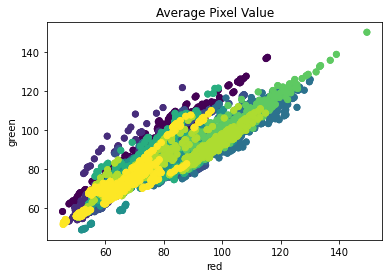

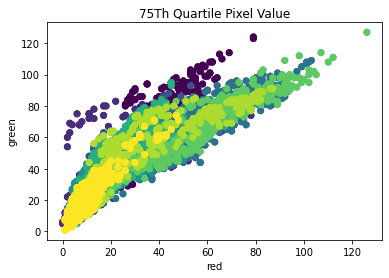

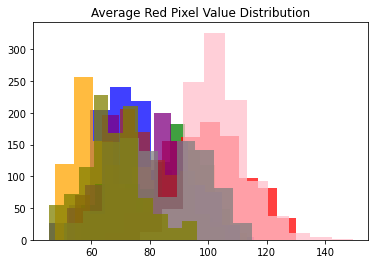

In [6]:
# Data Exploration----Comparing pixel colors across images across classification groups
n = 0
Colors = ['blue','orange','green','red','purple','brown','pink','gray','olive']
index = []
for j in range(9):
    for i in range(1000):
         index.append(n)
    n = n+1
ColorDim = [index,GetColorAverage(0),GetColorAverage(1),GetColorAverage(2), GetColorQ(0,25), GetColorQ(1,25), GetColorQ(2,25),GetColorQ(0,25), GetColorQ(1,25), GetColorQ(2,25)]
ColorDimDt = pd.DataFrame(columns = ('FishPosition','RedAvg','GreenAvg','BlueAvg','Red25Q','Green25Q','Blue25Q','Red75Q','Green75Q','Blue75Q'))
ColorDimDt = pd.DataFrame(np.transpose(ColorDim))
plt.show()


plt.scatter(ColorDimDt[1],ColorDimDt[2],c = ColorDimDt[0])
plt.xlabel("red")
plt.ylabel("green")
plt.title("Average Pixel Value")
plt.show()



plt.scatter(ColorDimDt[4],ColorDimDt[5],c = ColorDimDt[0])
plt.xlabel("red")
plt.ylabel("green")
plt.title("75Th Quartile Pixel Value")
plt.show()


for i in range(9):
    plt.hist(ColorDimDt[ColorDimDt[0]==i][1],color = Colors[i],alpha = .75)
    plt.title("Average Red Pixel Value Distribution")
plt.show()


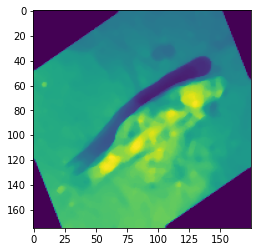

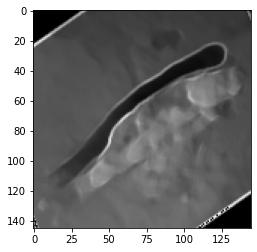

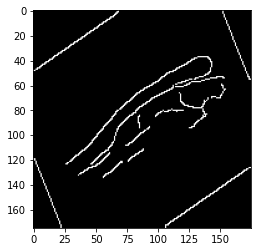

In [7]:
# Feature extraction. Finding ways to isolate the fish's edges
import matplotlib.pyplot as plt
resize = 175
cropl = 15
croph = resize-15
Resized = GrayImage[3500]
Resized = Resize(Resized, resize,resize)
Resized = cv2.medianBlur(Resized, 5)
Resized = cv2.medianBlur(Resized, 5)


#plt.imshow(Resized,cmap='gray')
#define the vertical filter
E = [[-1,0,1], [-2,0,2], [-1,0,1]]
NE = [[0,1,2], [-1,0,1], [-2,1,0]]
N = [[1,2,1], [0,0,0], [-1,-2,-1]]
NW = [[2,1,0], [1,0,-1], [0,-1,-2]]
W = [[-1,0,1], [2,0,-2], [1,0,-1]]
SW = [[0,-1,-2], [1,0,-1],[2,-1,0]]
S = [[-1,-2,-1], [0,0,0],[1,2,1]]
SE = [[-2,-1,0], [-1,0,1],[0,1,2]]


#read in the pinwheel image
img = Resized

#get the dimensions of the image
n,m = img.shape

#initialize the edges image
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2]
        East = E*local_pixels
        West = W*local_pixels
        North = N*local_pixels
        South = S*local_pixels
        NorthEast = NE*local_pixels
        NorthWest = NW*local_pixels
        SouthEast = SE*local_pixels
        SouthWest = SW*local_pixels
        
        Escore = East.sum()/4
        Wscore = West.sum()/4
        Nscore = North.sum()/4
        Sscore = South.sum()/4        
        NEscore = NorthEast.sum()/4
        NWscore = NorthWest.sum()/4
        SEscore = SouthEast.sum()/4
        SWscore = SouthWest.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (Escore**2+Wscore**2+Nscore**2+Sscore**2+ NEscore**2+ NWscore**2 +SEscore**2+SWscore**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = edge_score

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

plt.imshow(Resized)
plt.show()

Crop = edges_img[range(cropl,croph),:]
Crop = Crop[:,range(cropl,croph)]
plt.imshow(Crop, cmap = "gray")
plt.show()

edges = cv2.Canny(Resized,100,200)
plt.imshow(edges, cmap = 'gray')
plt.show()

In [8]:
TotalCounts = []
Fitted = joblib.load("NonCNNModels\PixelClassifierFitted.joblib")
k = 0
# Resizing and flattening images
for i in ColorImages:
    if k % 500 == 0: print("Processed: ", k)
    Image = GetFlattenedImageForClassification(i,50,50)
    PredictedLabels = Fitted.predict(Image)
    counter = Counter(PredictedLabels) 
    result = [(key, counter[key]) for key in counter]
    zeros = np.zeros(9, dtype=int)
    for i in result:
        j = ColorLabels.index(i[0])
        zeros[j] = i[1]
    TotalCounts.append(zeros)
    k = k + 1
Counts = pd.DataFrame(TotalCounts)
Counts.columns = ["Reds", "Oranges", "Browns", "Tans", "Blues", "LightBlues", "Grays", "Whites", "Blacks"]

Processed:  0
Processed:  500
Processed:  1000
Processed:  1500
Processed:  2000
Processed:  2500
Processed:  3000
Processed:  3500
Processed:  4000
Processed:  4500
Processed:  5000
Processed:  5500
Processed:  6000
Processed:  6500
Processed:  7000
Processed:  7500
Processed:  8000
Processed:  8500


In [9]:
pcatable = Counts[["Reds", "Oranges", "Browns","Tans","Whites"]]
pcatable = preprocessing.normalize(pcatable)
PCA = PCA(n_components = 4,  svd_solver='arpack')
PCA.fit(np.array(pcatable))

PCA(n_components=4, svd_solver='arpack')

In [10]:
n = 0
Colors = ['blue','orange','green','red','purple','brown','pink','gray','olive']
index = []
for j in range(9):
    for i in range(1000):
         index.append(n)
    n = n+1

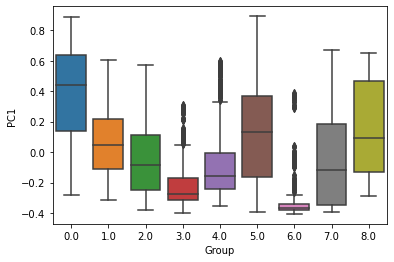

In [11]:

DF1 = pd.DataFrame(np.transpose([PCA.transform(pcatable)[:,0],index]))
DF1.columns = ["PC1",'Group']
sns.boxplot(x='Group', y="PC1", data=DF1)
plt.savefig("Data Exploration Reports\BoxPlotPC1.png")
plt.show()



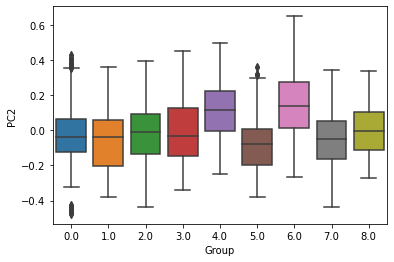

In [12]:
DF = pd.DataFrame(np.transpose([PCA.transform(pcatable)[:,1],index]))
DF.columns = ["PC2",'Group']
sns.boxplot(x='Group', y="PC2", data=DF)
plt.savefig("Data Exploration Reports\BoxPlotPC2.png")
plt.show()

In [13]:
Orig_WD = os.getcwd() 
os.chdir(os.path.join(Orig_WD,'Data Exploration Reports'))

image_tag = '<img src="BoxPlotPC1.png">'
image_tag2 = '<img src="BoxPlotPC2.png">'
#writing HTML Content
heading = '<h1>PCA On Pixel Color Counts</h1>'
subheading = '<h3>Component 1 and 2  </h3>'

header = '<div class="top">' + heading + subheading +'</div>'
content = '<div class="chart"> '+ image_tag +'</div>' '<div class="chart"> '+ image_tag2 +'</div>'
# Concating everything to a single string
html = header + content 

In [14]:
os.chdir(Orig_WD)
with open('Data Exploration Reports\BoxPlotReport.html','w+') as file:
    file.write(html)

In [15]:
from pandas_profiling import ProfileReport
report = ProfileReport(Counts[["Reds", "Oranges", "Browns","Tans","Whites"]])
profile = ProfileReport(Counts[["Reds", "Oranges", "Browns","Tans","Whites"]], minimal=False)
profile.to_file(output_file="Data Exploration Reports\PixelColorReport.html")

C:\Users\ddegroot\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]